In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [2]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House price prediction - Mumbai/california_housing.csv')

housing_df.info()
housing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


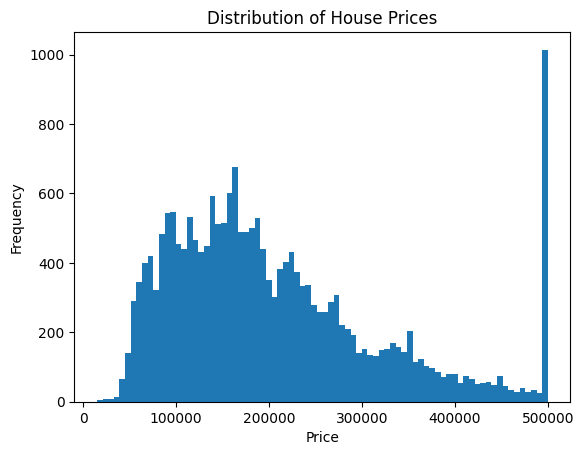

In [3]:
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

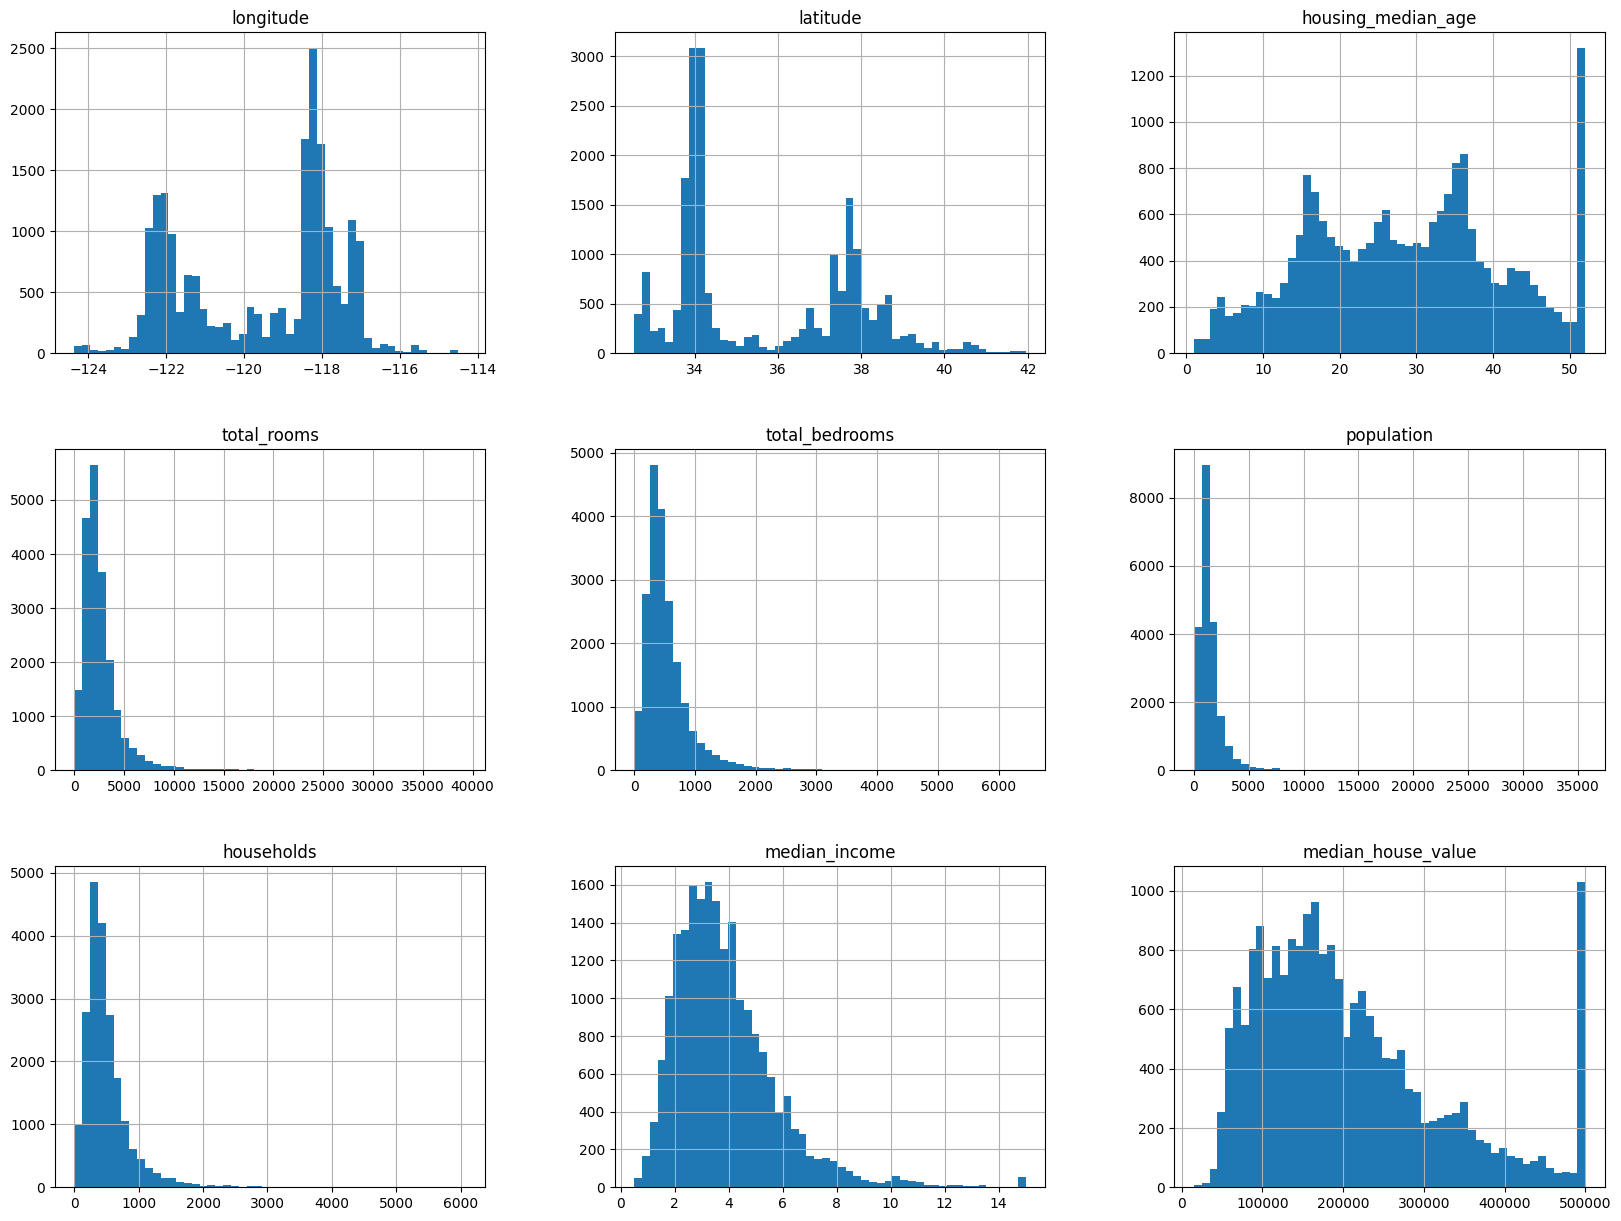

In [4]:
housing_df.hist(bins=50, figsize=(20,15))

# Remove outliers

In [5]:
def remove_outliers_iqr(df, columns):
  """
  Removes outliers from specified columns of a pandas DataFrame using the IQR method.

  Args:
    df: The pandas DataFrame.
    columns: A list of columns to remove outliers from.

  Returns:
    A new DataFrame with outliers removed.
  """

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

# Remove outliers from specified columns
housing_df = remove_outliers_iqr(housing_df, ['housing_median_age', 'median_income', 'median_house_value'])

# Display the updated DataFrame
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19237 non-null  float64
 1   latitude            19237 non-null  float64
 2   housing_median_age  19237 non-null  int64  
 3   total_rooms         19237 non-null  int64  
 4   total_bedrooms      19046 non-null  float64
 5   population          19237 non-null  int64  
 6   households          19237 non-null  int64  
 7   median_income       19237 non-null  float64
 8   ocean_proximity     19237 non-null  object 
 9   median_house_value  19237 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Encode categorical data

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19237 non-null  float64
 1   latitude            19237 non-null  float64
 2   housing_median_age  19237 non-null  int64  
 3   total_rooms         19237 non-null  int64  
 4   total_bedrooms      19046 non-null  float64
 5   population          19237 non-null  int64  
 6   households          19237 non-null  int64  
 7   median_income       19237 non-null  float64
 8   ocean_proximity     19237 non-null  object 
 9   median_house_value  19237 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
# let's see the unique categories of OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# LET'S COUNT
housing_df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,8353
INLAND,6477
NEAR OCEAN,2381
NEAR BAY,2021
ISLAND,5


In [9]:
# One-Hot Encoding

#Let's see how the Panda's get_dummies() function works
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
5          False   False   False      True       False
6          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[19237 rows x 5 columns]


In [10]:
# Let's replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'], dtype=int)

# Print the first few observations; notice the old OCEAN_PROXIMITY column is gone
housing_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0


In [11]:
# drop original column

housing_df = housing_df_encoded.drop('ocean_proximity_NEAR OCEAN', axis=1)

#rename column name
housing_df.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_UNDER 1H OCEAN'}, inplace=True)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 2 to 20639
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       19237 non-null  float64
 1   latitude                        19237 non-null  float64
 2   housing_median_age              19237 non-null  int64  
 3   total_rooms                     19237 non-null  int64  
 4   total_bedrooms                  19046 non-null  float64
 5   population                      19237 non-null  int64  
 6   households                      19237 non-null  int64  
 7   median_income                   19237 non-null  float64
 8   median_house_value              19237 non-null  int64  
 9   ocean_proximity_UNDER 1H OCEAN  19237 non-null  int64  
 10  ocean_proximity_INLAND          19237 non-null  int64  
 11  ocean_proximity_ISLAND          19237 non-null  int64  
 12  ocean_proximity_NEAR BAY        19237

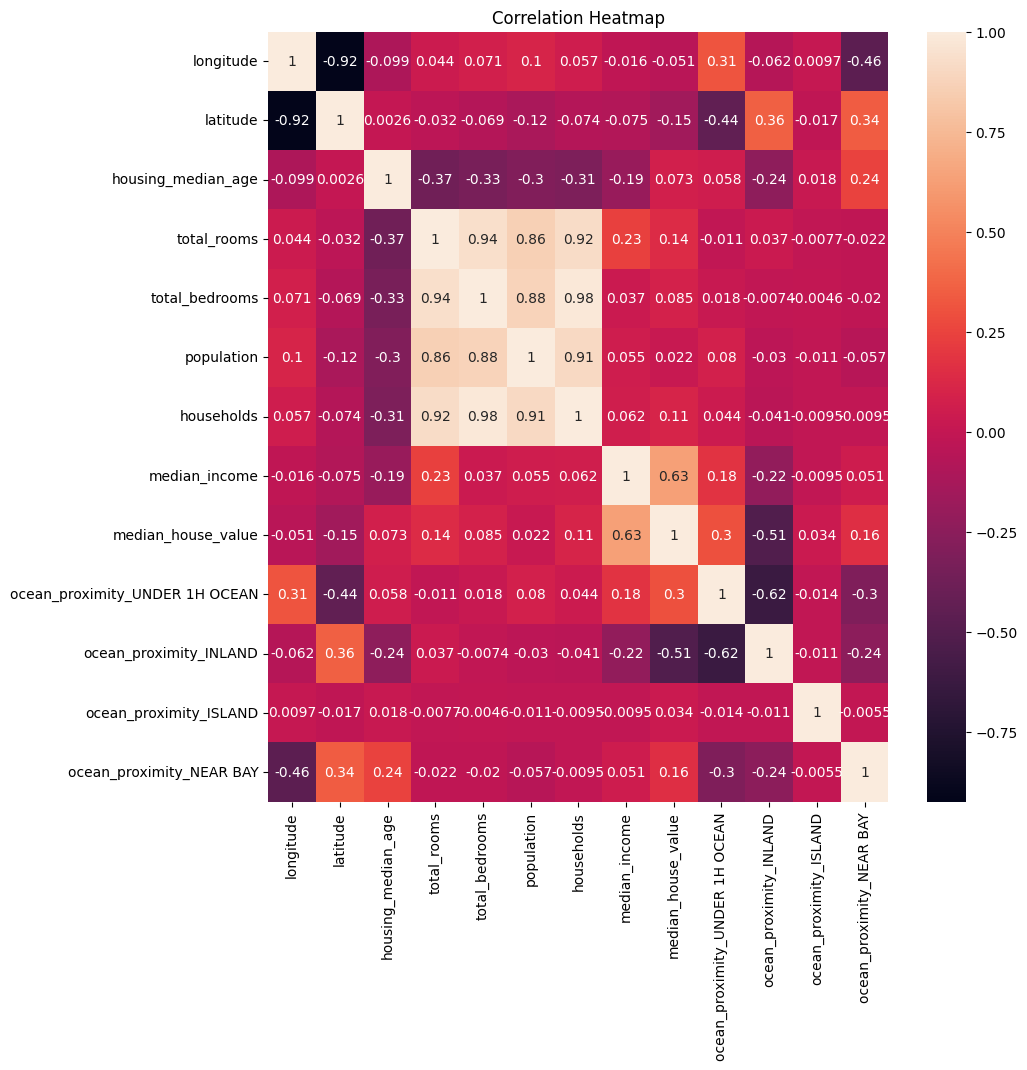

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(housing_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

### **Prepare and process data**

In [13]:
housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,191
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_UNDER 1H OCEAN,0


## Finding missing values using KNN

In [14]:
imputer = KNNImputer(n_neighbors=5)
housing_df[['total_bedrooms']] = imputer.fit_transform(housing_df[['total_bedrooms']])

In [15]:
# a new feature that is a ratio of the total rooms to household
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']

# a new feature that is a ratio of the population to the households
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

# let's combine the latitude and longtitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 2 to 20639
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       19237 non-null  float64
 1   latitude                        19237 non-null  float64
 2   housing_median_age              19237 non-null  int64  
 3   total_rooms                     19237 non-null  int64  
 4   total_bedrooms                  19237 non-null  float64
 5   population                      19237 non-null  int64  
 6   households                      19237 non-null  int64  
 7   median_income                   19237 non-null  float64
 8   median_house_value              19237 non-null  int64  
 9   ocean_proximity_UNDER 1H OCEAN  19237 non-null  int64  
 10  ocean_proximity_INLAND          19237 non-null  int64  
 11  ocean_proximity_ISLAND          19237 non-null  int64  
 12  ocean_proximity_NEAR BAY        19237

In [16]:
# remove total_rooms, households, total_bedrooms, population, longtitude, latitude
housing_df = housing_df.drop(['total_rooms', 'households', 'total_bedrooms', 'population', 'longitude', 'latitude'], axis=1)

In [17]:
housing_df.info()
housing_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 2 to 20639
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   housing_median_age              19237 non-null  int64  
 1   median_income                   19237 non-null  float64
 2   median_house_value              19237 non-null  int64  
 3   ocean_proximity_UNDER 1H OCEAN  19237 non-null  int64  
 4   ocean_proximity_INLAND          19237 non-null  int64  
 5   ocean_proximity_ISLAND          19237 non-null  int64  
 6   ocean_proximity_NEAR BAY        19237 non-null  int64  
 7   rooms_per_household             19237 non-null  float64
 8   bedrooms_per_room               19237 non-null  float64
 9   population_per_household        19237 non-null  float64
 10  coords                          19237 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


,housing_median_age,median_income,median_house_value,ocean_proximity_UNDER 1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,rooms_per_household,bedrooms_per_room,population_per_household,coords
2,52,7.2574,352100,0,0,0,1,8.288136,0.129516,2.802260,-3.229590
3,52,5.6431,341300,0,0,0,1,5.817352,0.184458,2.547945,-3.229855
4,52,3.8462,342200,0,0,0,1,6.281853,0.172096,2.181467,-3.229855
5,52,4.0368,269700,0,0,0,1,4.761658,0.231774,2.139896,-3.229855
6,52,3.6591,299200,0,0,0,1,4.931907,0.192899,2.128405,-3.230708


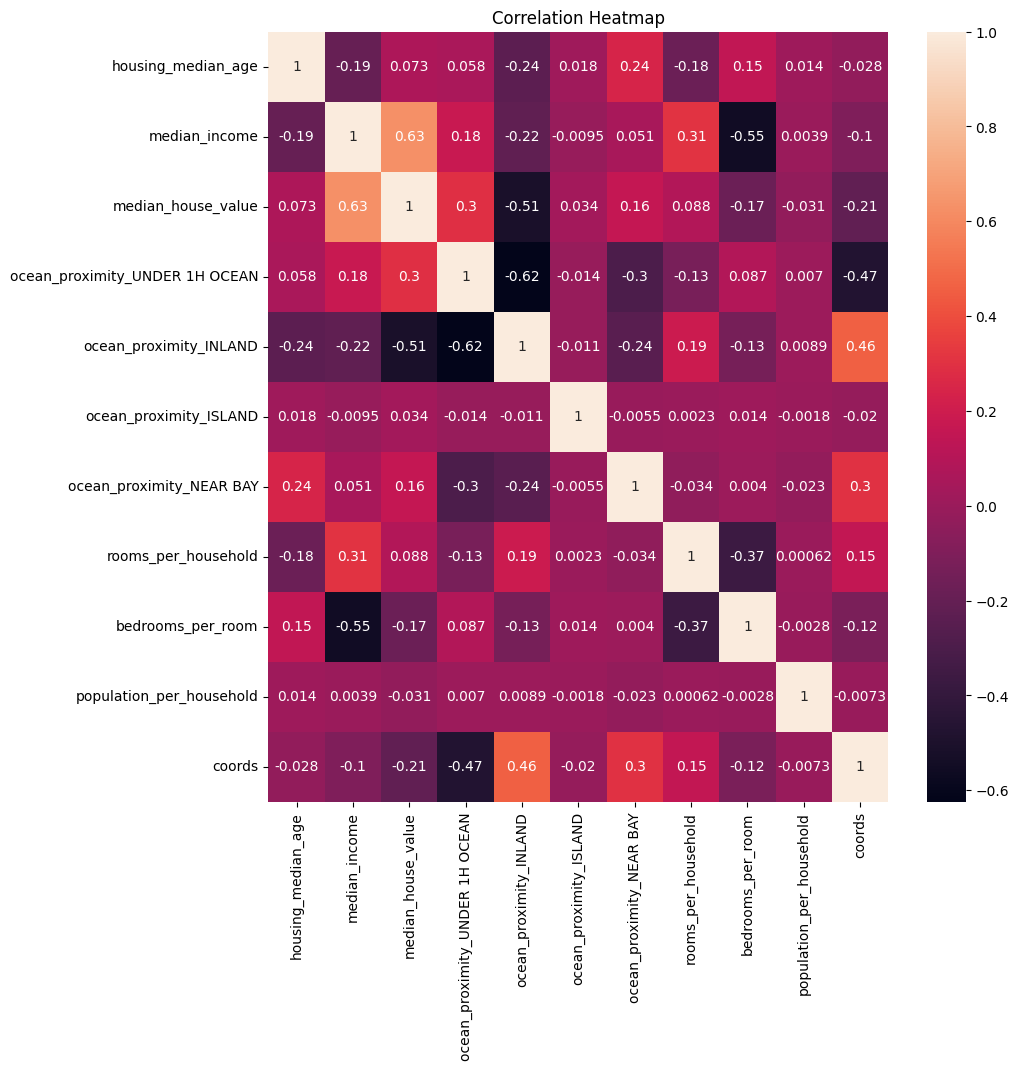

In [18]:
corr = housing_df.corr()
plt.figure(figsize=(10 , 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Split training & test data

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'median_house_value' is the target variable
X = housing_df.drop('median_house_value', axis=1)  # Features
y = housing_df['median_house_value']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# confirm how the data was split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15389, 10)
X_test shape: (3848, 10)
y_train shape: (15389,)
y_test shape: (3848,)


#Linear Regression - Model Training

In [20]:
from sklearn.linear_model import LinearRegression

#create a linear regressor using all the feature variables
reg_model = LinearRegression()

#train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

Run the prediction

In [21]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

Evaluate the model

In [22]:
#compare actual values with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df

,Actual,Predicted
761,161900,184178.009393
9311,337500,204675.317286
6337,302200,277035.199602
2031,60800,54383.969293
11956,113300,94080.284706
...,...,...
12922,143600,146497.351116
19269,167600,201287.982565
5687,394100,339333.721302
12754,114100,126663.721808


Evaluate the model using the R^2 matric

In [23]:
#determine accuracy using R^2
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.56


# RandonForestRegressor - Model Training

In [24]:
from sklearn.ensemble import RandomForestRegressor

#create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

#train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

Run the prediction

In [25]:
y_rf_pred_test = rf_model.predict(X_test)

Evaluate the model

In [26]:
#compare the actual values with predicted values
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})
rf_pred_test_df

#determine accuracy using R^2
from sklearn.metrics import r2_score

score  = r2_score(y_test, y_rf_pred_test)
print("R^2 Test: {}".format(score))

R^2 Test: 0.7095066069483563


# XGBoost - Model Training

In [27]:
from xgboost import XGBRegressor

#create an XGBoost regressor
xgb_model = XGBRegressor()

In [28]:
# Train the model using training sets
# Convert column names to strings if they are not already
# Use a list comprehension to ensure valid feature names
X_train.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
#run the prediction
y_xgb_pred_test = xgb_model.predict(X_test)

Evalute the model

In [30]:
#model evaluation
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df

,Actual,Predicted
761,161900,229613.796875
9311,337500,257707.296875
6337,302200,265934.343750
2031,60800,62017.746094
11956,113300,124369.093750
...,...,...
12922,143600,171146.406250
19269,167600,202100.531250
5687,394100,347854.906250
12754,114100,133779.531250


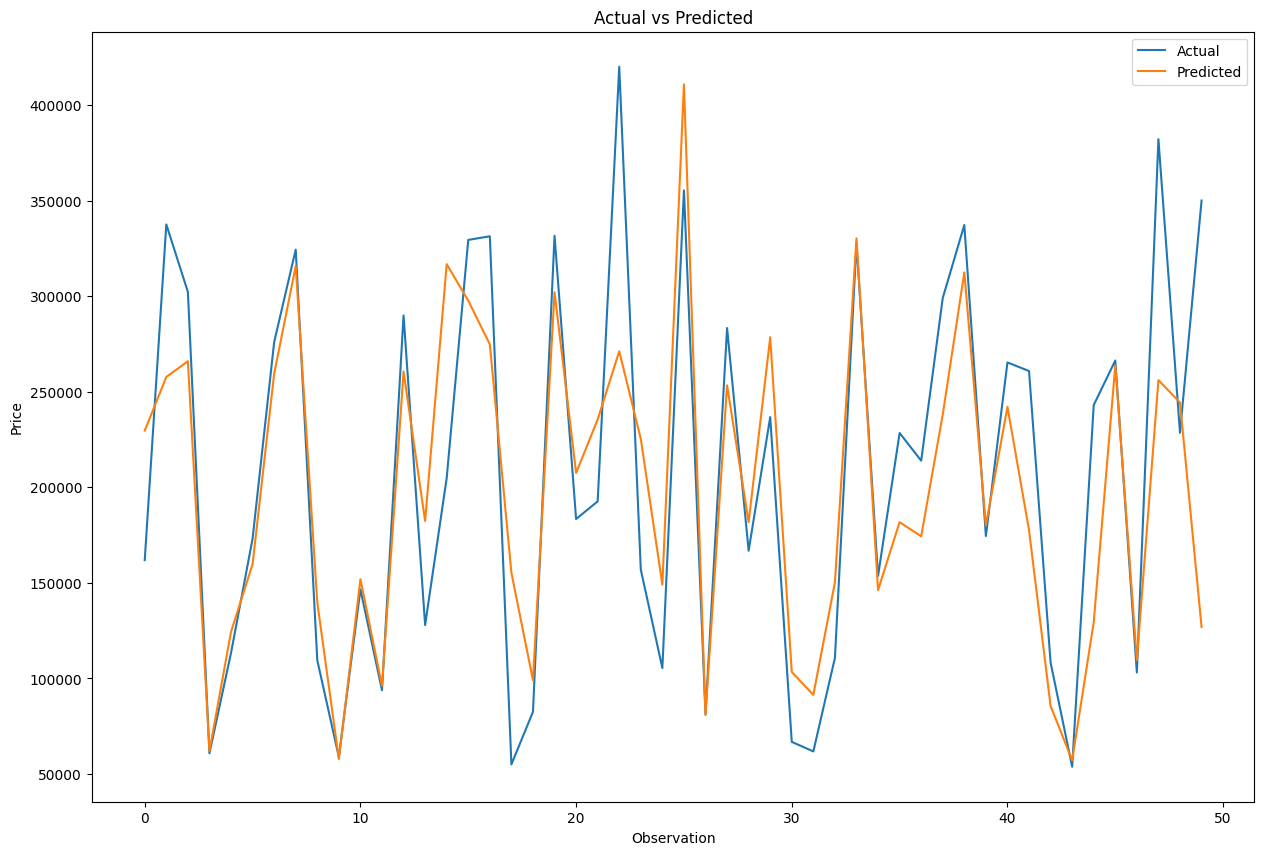

In [31]:
fig = plt.figure(figsize=(15,10))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop('index', axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.show()

In [32]:
from sklearn.metrics import r2_score

score  = r2_score(y_test, y_xgb_pred_test)
print("R^2 Test: {}".format(score))

R^2 Test: 0.7359520196914673


In [33]:
#determine mean sqaure error and root mean sqayre error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 2256648448.0
RMSE: 47504.19400431924


# XGBoost with hyper parameters

In [34]:
xgb_mdoel_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lamda=1,
    verbosity=1
    )

xgb_mdoel_2.fit(X_train,y_train)

#run the prediction on the training and testing data
y_xgb_2_pred_test = xgb_mdoel_2.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:46:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "reg_lamda" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
#compare the actual values with the predicted values
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})
xgb_2_pred_test_df

,Actual,Predicted
761,161900,219330.921875
9311,337500,242434.046875
6337,302200,262115.234375
2031,60800,59073.113281
11956,113300,116383.539062
...,...,...
12922,143600,163803.750000
19269,167600,186604.531250
5687,394100,347384.156250
12754,114100,123362.859375


In [36]:
#determine accuracy using R^2
r2_xgb_model_2_test = round(xgb_mdoel_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.75
